# Traffic Sign Classification with Keras


### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

### Train, Validation and Test Split

In [4]:
with open("traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_train.shape

(34799, 32, 32, 3)

In [7]:
y_train.shape

(34799,)

### Data Visualization

31

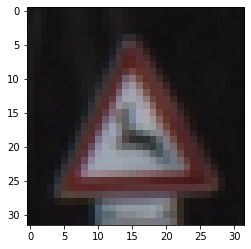

In [8]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

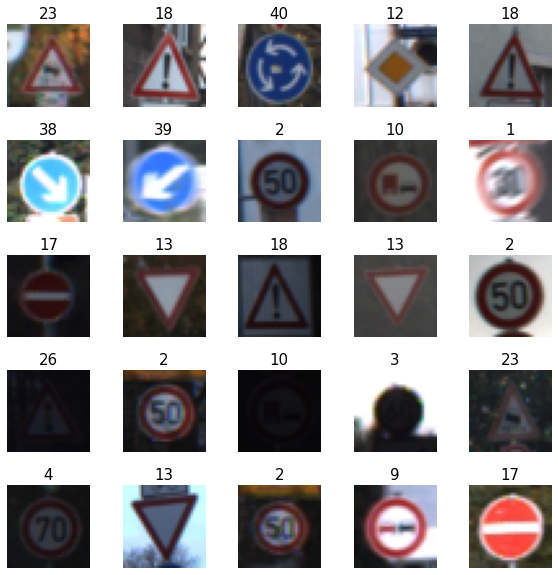

In [9]:
# Visualize a Batch of Images
 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # Read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);        

### Convert Images to GrayScale and Perform Normalization

In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [11]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [12]:
X_train_gray.shape

(34799, 32, 32, 1)

In [13]:
X_test_gray.shape

(12630, 32, 32, 1)

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [15]:
X_train_gray_norm

array([[[[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        [[ 0.96614583],
         [ 0.97916667],
         [ 0.97395833],
         ...,
         [ 0.9921875 ],
         [ 0.9921875 ],
         [ 0.9921875 ]],

        ...,

        [[ 0.5390625 ],
         [ 0.0859375 ],
         [-0.73697917],
         ...,
         [-0.74739583],
         [-0.7578125 ],
         [-0.84635417]],

        [[ 0.72916667],
         [ 0.359375  ],
         [-0.67708333],
         ...,
         [-0.80729167],
         [-0.79427083],
         [-0.83072917]],

        [[ 0.7265625 ],
         [ 0.29427083],
         [-0.73697917],
         ...,
         [-0.8046875 ],
         [-0.79427083],
         [-0.8203125 ]]],


       [[[-0.72135417],


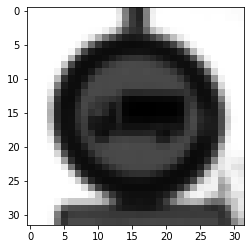

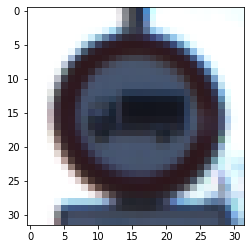

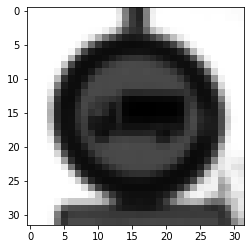

In [16]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray');

### Building the CNN Model

In [24]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

### Train the Model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ES = EarlyStopping(monitor="val_loss", patience=5)

In [26]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation),
                 callbacks=[ES])

Epoch 1/50
70/70 [==============================] - 6s 79ms/step - loss: 3.1281 - accuracy: 0.1963 - val_loss: 2.6732 - val_accuracy: 0.3141
Epoch 2/50
70/70 [==============================] - 6s 82ms/step - loss: 1.6618 - accuracy: 0.5375 - val_loss: 1.4141 - val_accuracy: 0.5778
Epoch 3/50
70/70 [==============================] - 6s 92ms/step - loss: 0.9471 - accuracy: 0.7241 - val_loss: 0.9805 - val_accuracy: 0.7141
Epoch 4/50
70/70 [==============================] - 7s 102ms/step - loss: 0.6792 - accuracy: 0.8064 - val_loss: 0.8457 - val_accuracy: 0.7456
Epoch 5/50
70/70 [==============================] - 7s 100ms/step - loss: 0.5421 - accuracy: 0.8465 - val_loss: 0.7373 - val_accuracy: 0.7825
Epoch 6/50
70/70 [==============================] - 7s 98ms/step - loss: 0.4591 - accuracy: 0.8713 - val_loss: 0.7056 - val_accuracy: 0.7943
Epoch 7/50
70/70 [==============================] - 7s 99ms/step - loss: 0.3801 - accuracy: 0.8989 - val_loss: 0.6542 - val_accuracy: 0.8048
Epoch 8/50


### Assess Model Performance 

In [27]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 0.9998 - accuracy: 0.8369
Test Accuracy: 0.8368963003158569


In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

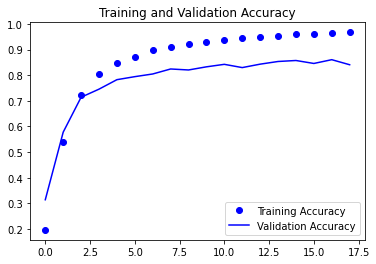

In [30]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

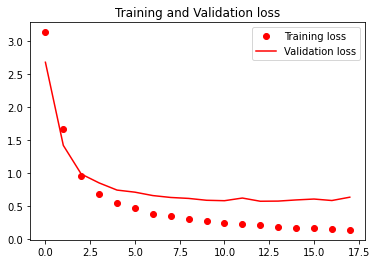

In [31]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [35]:
predicted_classes = np.argmax(CNN.predict(X_test_gray_norm), axis=1)
y_true = y_test

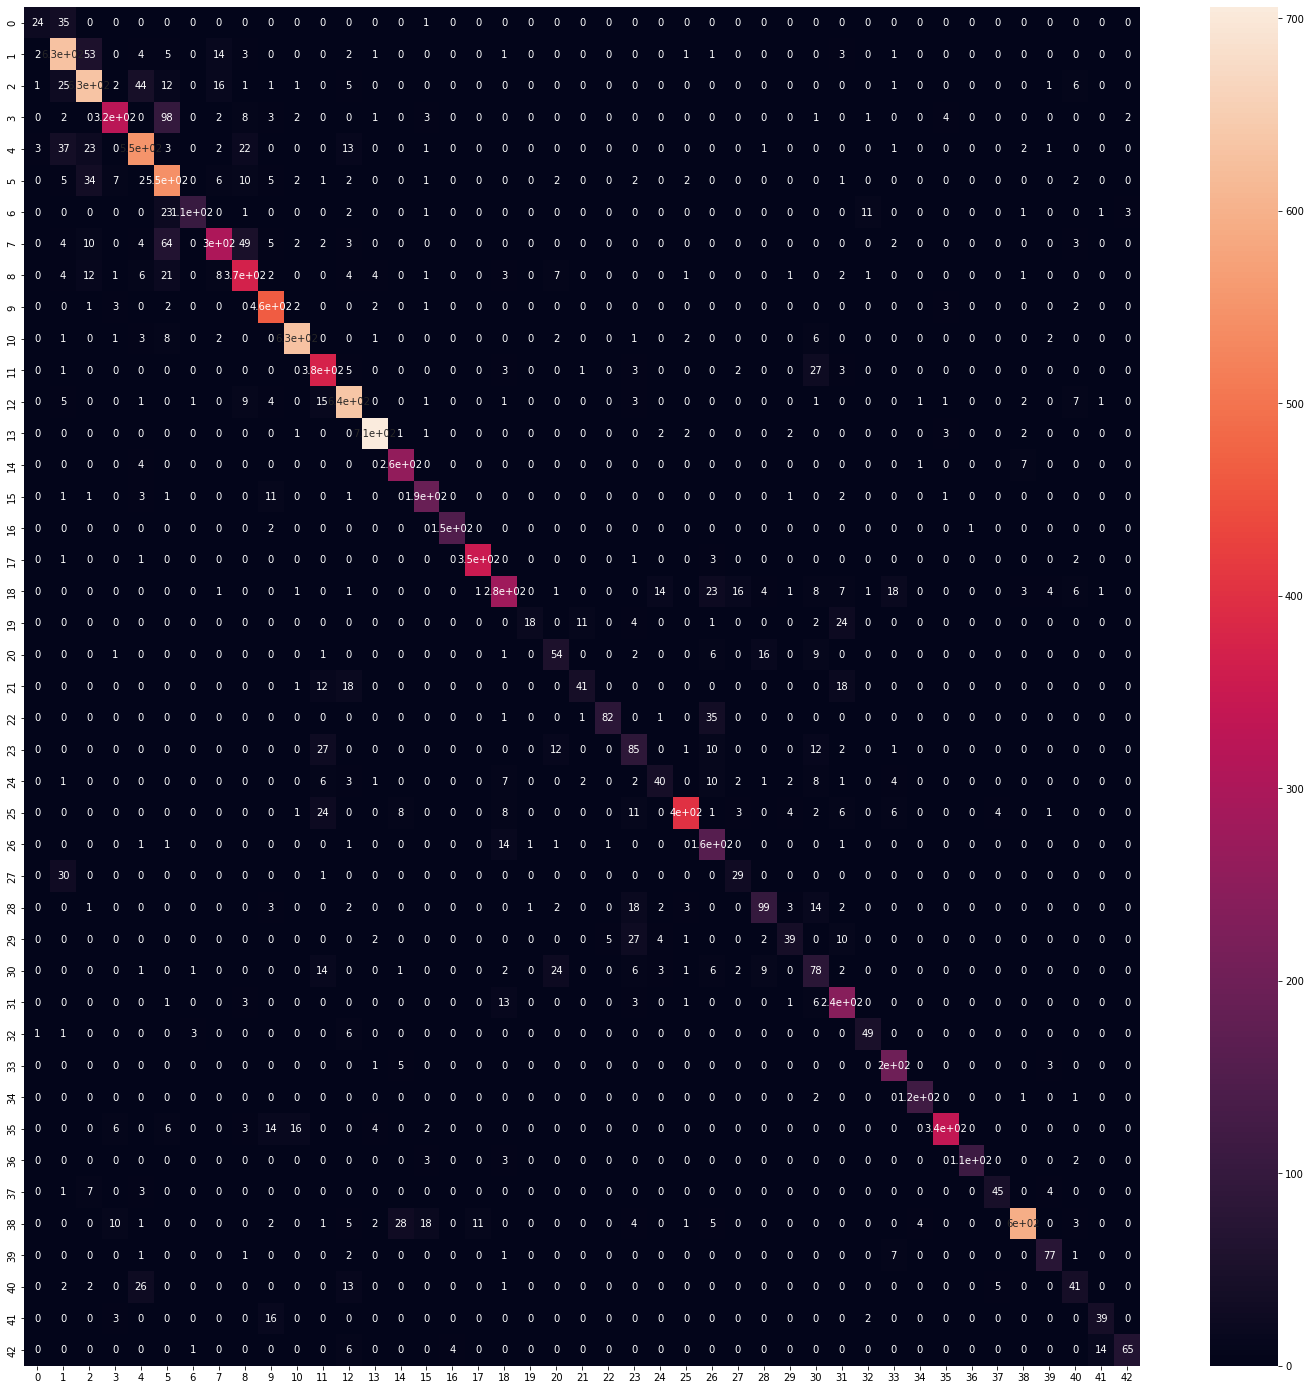

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

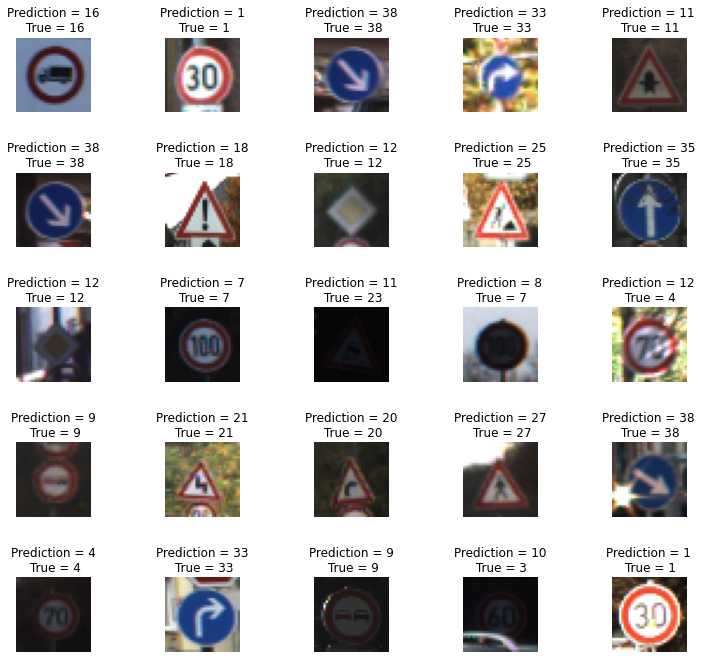

In [38]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1);    